In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
# Create dummy variables
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [8]:
X = pd.concat([X, geography, gender], axis=1)

In [9]:
X = X.drop(['Geography', 'Gender'], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [13]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [15]:
# Initlialising the ANN
classifier = Sequential()

In [16]:
# Adding the input layer and the first hidden layer
# Because he_unitform works well with relu
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [17]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [18]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [19]:
# Complie the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 4s 7ms/step - loss: 0.5157 - accuracy: 0.7960 - val_loss: 0.4887 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4690 - accuracy: 0.7962 - val_loss: 0.4613 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4491 - accuracy: 0.7962 - val_loss: 0.4470 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4378 - accuracy: 0.7962 - val_loss: 0.4398 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4304 - accuracy: 0.7964 - val_loss: 0.4345 - val_accuracy: 0.7963
Epoch 6/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4263 - accuracy: 0.7992 - val_loss: 0.4291 - val_accuracy: 0.7989
Epoch 7/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4220 - accuracy: 0.8044 - val_loss: 0.4255 - val_accuracy: 0.8042

Epoch 58/100
536/536 [==============================] - 4s 8ms/step - loss: 0.3342 - accuracy: 0.8612 - val_loss: 0.3559 - val_accuracy: 0.8523
Epoch 59/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3334 - accuracy: 0.8645 - val_loss: 0.3557 - val_accuracy: 0.8504
Epoch 60/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3342 - accuracy: 0.8628 - val_loss: 0.3562 - val_accuracy: 0.8508
Epoch 61/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3341 - accuracy: 0.8630 - val_loss: 0.3569 - val_accuracy: 0.8531
Epoch 62/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3334 - accuracy: 0.8621 - val_loss: 0.3582 - val_accuracy: 0.8504
Epoch 63/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3338 - accuracy: 0.8627 - val_loss: 0.3568 - val_accuracy: 0.8527
Epoch 64/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3333 - accuracy: 0.8615 - val_loss: 0.3591 - val_accuracy:

In [22]:
df.isnull().values.any()

False

In [23]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
model_history

In [29]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

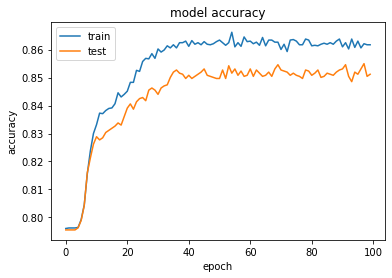

In [34]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Part 3 - Making the predictions and evaluating the model

In [35]:
# Predicting the Test Set results
y_pred = classifier.predict(X_test)
y_pred

array([[0.31341088],
       [0.24538592],
       [0.11441392],
       ...,
       [0.37996018],
       [0.16375852],
       [0.19293171]], dtype=float32)

In [36]:
len(y_pred)

2000

In [37]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1509,   86],
       [ 203,  202]])

Text(15.0, 0.5, 'Truth')

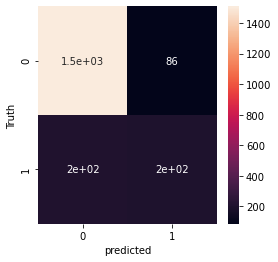

In [41]:
import seaborn as sb
plt.figure(figsize=(4,4))
sb.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [46]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8555

In [50]:
new_classifier = Sequential()

# 1st hidden layer
new_classifier.add(Dense(units = 10, kernel_initializer='he_normal', activation='relu', input_dim=11))

# 2st hidden layer
new_classifier.add(Dense(units=20, kernel_initializer='he_normal', activation='relu'))

# 3st hidden layer
new_classifier.add(Dense(units=15, kernel_initializer='he_normal', activation='relu'))

# Adding output layer
new_classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compiling the ANN
new_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
new_model_history = new_classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 5s 9ms/step - loss: 0.4798 - accuracy: 0.7918 - val_loss: 0.4489 - val_accuracy: 0.8012
Epoch 2/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4396 - accuracy: 0.8031 - val_loss: 0.4386 - val_accuracy: 0.8058
Epoch 3/100
536/536 [==============================] - 4s 8ms/step - loss: 0.4243 - accuracy: 0.8141 - val_loss: 0.4286 - val_accuracy: 0.8076
Epoch 4/100
536/536 [==============================] - 4s 8ms/step - loss: 0.4062 - accuracy: 0.8263 - val_loss: 0.4075 - val_accuracy: 0.8217
Epoch 5/100
536/536 [==============================] - 4s 8ms/step - loss: 0.3819 - accuracy: 0.8405 - val_loss: 0.3921 - val_accuracy: 0.8315
Epoch 6/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3644 - accuracy: 0.8475 - val_loss: 0.3810 - val_accuracy: 0.8406
Epoch 7/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3547 - accuracy: 0.8524 - val_loss: 0.3757 - val_accuracy: 0.8402

Epoch 58/100
536/536 [==============================] - 5s 10ms/step - loss: 0.3023 - accuracy: 0.8718 - val_loss: 0.3693 - val_accuracy: 0.8493
Epoch 59/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3012 - accuracy: 0.8718 - val_loss: 0.3730 - val_accuracy: 0.8440
Epoch 60/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3018 - accuracy: 0.8718 - val_loss: 0.3679 - val_accuracy: 0.8448
Epoch 61/100
536/536 [==============================] - 5s 10ms/step - loss: 0.3012 - accuracy: 0.8729 - val_loss: 0.3686 - val_accuracy: 0.8455
Epoch 62/100
536/536 [==============================] - 5s 10ms/step - loss: 0.3012 - accuracy: 0.8731 - val_loss: 0.3684 - val_accuracy: 0.8516
Epoch 63/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3004 - accuracy: 0.8720 - val_loss: 0.3693 - val_accuracy: 0.8459
Epoch 64/100
536/536 [==============================] - 5s 9ms/step - loss: 0.2999 - accuracy: 0.8731 - val_loss: 0.3698 - val_accura

In [52]:
new_y_pred = new_classifier.predict(X_test)
new_y_pred = (new_y_pred > 0.5)

In [54]:
# Confusion matrix
cm_new = confusion_matrix(y_test, y_pred)
cm_new

array([[1509,   86],
       [ 203,  202]])

Text(15.0, 0.5, 'Truth')

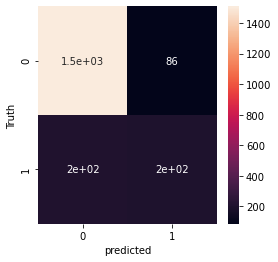

In [55]:
plt.figure(figsize=(4,4))
sb.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [57]:
new_score = accuracy_score(new_y_pred, y_test)
new_score

0.854

#### Using Dropout

------ Drop Classifier ------
Epoch 1/100
536/536 [==============================] - 6s 11ms/step - loss: 0.6238 - accuracy: 0.7371 - val_loss: 0.5003 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 4s 8ms/step - loss: 0.5262 - accuracy: 0.7822 - val_loss: 0.4806 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 6s 11ms/step - loss: 0.5026 - accuracy: 0.7927 - val_loss: 0.4718 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4923 - accuracy: 0.7925 - val_loss: 0.4611 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 6s 11ms/step - loss: 0.4689 - accuracy: 0.7977 - val_loss: 0.4497 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 5s 9ms/step - loss: 0.4697 - accuracy: 0.7964 - val_loss: 0.4432 - val_accuracy: 0.7959
Epoch 7/100
536/536 [==============================] - 6s 11ms/step - loss: 0.4617 - accuracy: 0.7977 - val_l

Epoch 57/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3750 - accuracy: 0.8429 - val_loss: 0.3729 - val_accuracy: 0.8421
Epoch 58/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3765 - accuracy: 0.8416 - val_loss: 0.3711 - val_accuracy: 0.8413
Epoch 59/100
536/536 [==============================] - 4s 8ms/step - loss: 0.3837 - accuracy: 0.8390 - val_loss: 0.3681 - val_accuracy: 0.8440
Epoch 60/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3748 - accuracy: 0.8393 - val_loss: 0.3694 - val_accuracy: 0.8429
Epoch 61/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3761 - accuracy: 0.8418 - val_loss: 0.3694 - val_accuracy: 0.8440
Epoch 62/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3766 - accuracy: 0.8405 - val_loss: 0.3681 - val_accuracy: 0.8474
Epoch 63/100
536/536 [==============================] - 5s 10ms/step - loss: 0.3811 - accuracy: 0.8408 - val_loss: 0.3736 - val_accuracy

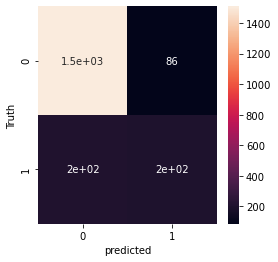

In [60]:
drop_classifier = Sequential()

# 1st hidden layer
drop_classifier.add(Dense(units = 10, kernel_initializer='he_normal', activation='relu', input_dim=11))
drop_classifier.add(Dropout(0.3))

# 2st hidden layer
drop_classifier.add(Dense(units=20, kernel_initializer='he_normal', activation='relu'))
drop_classifier.add(Dropout(0.4))

# 3st hidden layer
drop_classifier.add(Dense(units=15, kernel_initializer='he_normal', activation='relu'))
drop_classifier.add(Dropout(0.2))

# Adding output layer
drop_classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
print('-'*6 + ' Drop Classifier ' + '-'*6)
print(drop_classifier)

# Compiling the ANN
drop_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

drop_model_history = drop_classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

drop_y_pred = new_classifier.predict(X_test)
drop_y_pred = (drop_y_pred > 0.5)

# Confusion matrix
drop_cm = confusion_matrix(y_test, y_pred)
print('-'*6 + ' Confusion Matrix ' + '-'*6)
print(drop_cm)

# Plotting Confusion Matrix
plt.figure(figsize=(4,4))
sb.heatmap(drop_cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.plot()

# Calculating accuracy score
drop_score = accuracy_score(drop_y_pred, y_test)
print('-'*6+ ' DropScore '+ '-'*6)
print(drop_score)

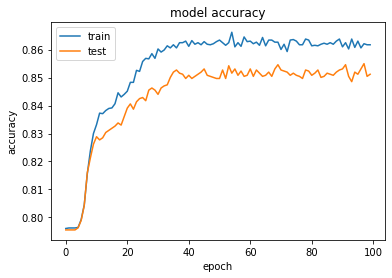

In [63]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

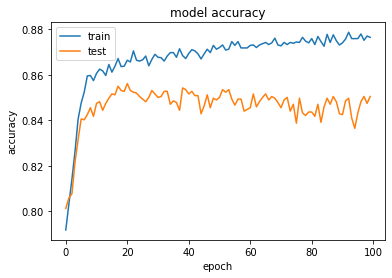

In [66]:
plt.plot(new_model_history.history['accuracy'])
plt.plot(new_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

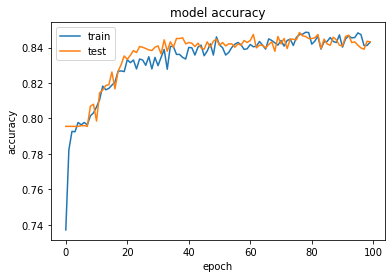

In [65]:
plt.plot(drop_model_history.history['accuracy'])
plt.plot(drop_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()